C:\Users\Andrea Fox\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


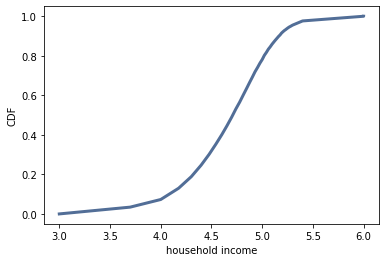

mean 74278.7075311872
std 93946.92996347835
median 51226.45447894046
skewness 4.949920244429583
pearson skewness 0.7361258019141782
cdf[mean] 0.660005879566872


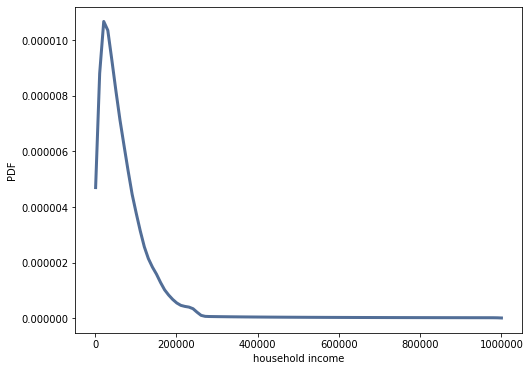

<Figure size 576x432 with 0 Axes>

In [5]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss
import density
import hinc
import thinkstats2
import thinkplot
#6-1 Skewness
#Creating dataframe from brfss
df = brfss.ReadBrfss(nrows=None)
#Creating a sample where each income is equal in each range
def InterpolateSample(df, log_upper=6.0):
    # Finding the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    #Finding the lower bound
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # Puts everything into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

def main():
    #Creating dataframe from hinc data (has information about hosehold incomes) and created variable with sample
    df = hinc.ReadData()
    log_sample = InterpolateSample(df, log_upper=6.0)
    #Plotting Cdf
    log_cdf = thinkstats2.Cdf(log_sample)
    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='CDF')
    #Finding mean, median, skewness, Pearson skewness, and cdf mean from sample
    sample = np.power(10, log_sample)
    mean, median = density.Summarize(sample)
 
    cdf = thinkstats2.Cdf(sample)
    print('cdf[mean]', cdf[mean])
    #Plotting estimated pdf of sample
    pdf = thinkstats2.EstimatedPdf(sample)
    thinkplot.Pdf(pdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='PDF')


if __name__ == "__main__":
    main()